In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [2]:
salary = pd.read_csv("salary.csv")

team = pd.read_csv("team.csv")
player = pd.read_csv("player.csv")

batting = pd.read_csv("batting.csv")

# Exercise 1: 
## a) Compute the correlation between mean salary and year.
## b) Generate a graph of mean salary per year.

In [3]:
salary.head()

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
meansalary_year = salary.groupby('year')['salary'].mean().reset_index()
meansalary_year

,year,salary
0,1985,476299
1,1986,417147
2,1987,434729
3,1988,453171
4,1989,506323
5,1990,511973
6,1991,894961
7,1992,1047520
8,1993,976966
9,1994,1049588


In [5]:
meansalary_year.corr()

,year,salary
year,1.000000,0.983687
salary,0.983687,1.000000


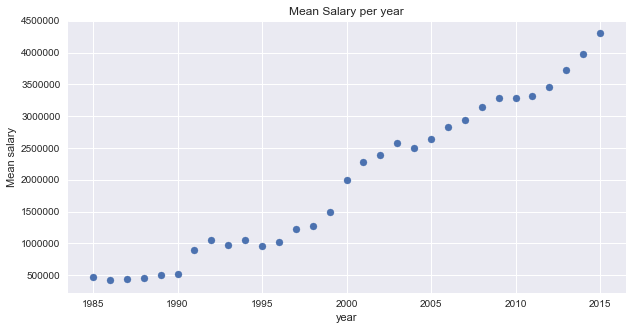

In [6]:
plt.scatter(meansalary_year['year'], meansalary_year['salary'] )
plt.xlabel("year")
plt.ylabel("Mean salary")
plt.title("Mean Salary per year")

# Exercise 2: 
## a) Find the best line that approximates mean salary with respect to years. 
## b) Plot this line together with the data from exercise 1.

In [7]:
result = smf.ols('salary ~ year', data = meansalary_year).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     867.2
Date:                Mon, 31 Jul 2017   Prob (F-statistic):           3.70e-23
Time:                        10:54:18   Log-Likelihood:                -424.86
No. Observations:                  31   AIC:                             853.7
Df Residuals:                      29   BIC:                             856.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -2.63e+08      9e+06    -29.228      0.000     -2.81e+08 -2.45e+08
year        1.325e+05   4499.196     29.448      0.000      1.23e+05  1.42e+05
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.511
Skew:                          -0.310   Prob(JB):                        0.774
Kurtosis:                       2.890   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

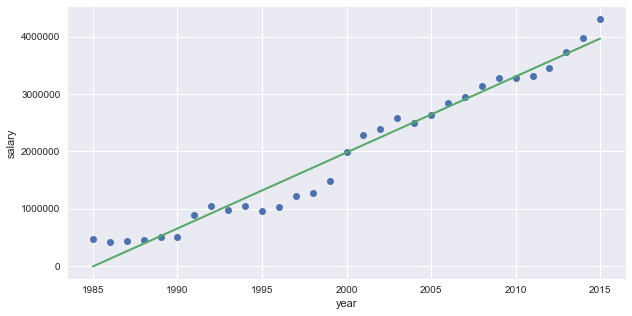

In [8]:
x = meansalary_year['year']
y = meansalary_year['salary']
plt.figure()
plt.plot(x,y,'o')
plt.plot(x, result.fittedvalues, '-', lw = 2)
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

# Exercise 3: Create a box plot for salaries per year.

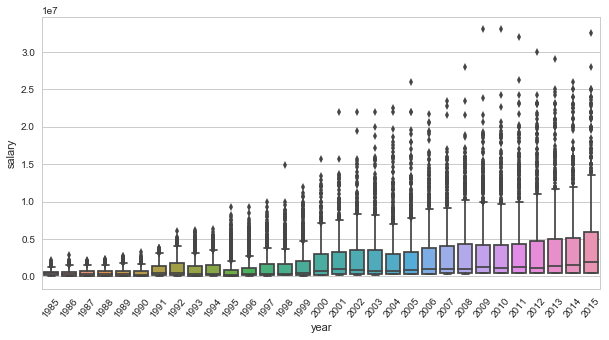

In [9]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="year", y="salary", data=salary)
plt.setp(ax.get_xticklabels(), rotation = 50)
plt.show(ax)

# Exercise 4: From the previous graph we can see an increasing disparity in salaries as time increases. 
## a) How would you measure disparity in salaries? 
## b) Compute the correlation of disparity and years.
## c) Find the best line that approximates disparity with respect to years.

a)standard deviation


In [10]:
salary_disparity = salary.groupby('year')['salary'].std().reset_index()
salary_disparity.columns = ['year', 'std_deviation']
salary_disparity

,year,std_deviation
0,1985,3.433209e+05
1,1986,3.940176e+05
2,1987,4.311822e+05
3,1988,4.531581e+05
4,1989,5.380454e+05
5,1990,5.524405e+05
6,1991,9.398494e+05
7,1992,1.180646e+06
8,1993,1.284734e+06
9,1994,1.352683e+06


In [11]:
result_disparity = smf.ols('std_deviation ~ year', data = salary_disparity).fit()
result_disparity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          std_deviation   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1827.
Date:                Mon, 31 Jul 2017   Prob (F-statistic):           9.57e-28
Time:                        10:54:28   Log-Likelihood:                -423.17
No. Observations:                  31   AIC:                             850.3
Df Residuals:                      29   BIC:                             853.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.616e+08   8.52e+06    -42.436      0.000     -3.79e+08 -3.44e+08
year        1.821e+05   4260.135     42.742      0.000      1.73e+05  1.91e+05
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.044
Skew:                          -0.057   Prob(JB):                        0.978
Kurtosis:                       2.855   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

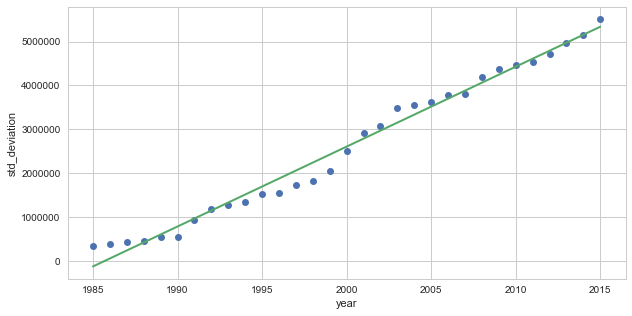

In [12]:
x = salary_disparity['year']
y = salary_disparity['std_deviation']
plt.figure()
plt.plot(x,y,'o')
plt.plot(x, result_disparity.fittedvalues, '-', lw = 2)
plt.xlabel('year')
plt.ylabel('std_deviation')
plt.show()

# Exercise 5: 
## a) Build a predictive model for the amount of hits for a team given Games played, Wins, Walks by batters, At bats, Fielding  percentage, Outs Pitched (innings pitched x 3), Hits allowed, Earned runs allowed, Doubles. To solve this problem you will use team.csv. 

## b) How does your model measure accuracy?
## c) What was the score for its accuracy?
## d) Choose two features and create a 3d plot of feature1, feature2, h.

In [15]:
team = pd.read_csv("team.csv")
team.columns


Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype='object')

In [25]:
team.corr().head()

,year,rank,g,ghome,w,l,r,ab,h,double,...,ha,hra,bba,soa,e,dp,fp,attendance,bpf,ppf
year,1.000000,-0.293981,0.601304,0.341956,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,...,0.507877,0.884038,0.572311,0.879181,-0.833145,0.517770,0.777934,0.810843,0.002673,-0.007313
rank,-0.293981,1.000000,-0.171295,-0.085398,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,...,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.030141,-0.298955,-0.465841,-0.161572,0.117475
g,0.601304,-0.171295,1.000000,0.963764,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,...,0.858471,0.549978,0.776006,0.641185,-0.494665,0.612708,0.859709,0.405767,0.040381,-0.005753
ghome,0.341956,-0.085398,0.963764,1.000000,0.358841,0.295313,0.353552,0.904329,0.547261,0.379173,...,0.519463,0.408671,0.370675,0.490309,-0.208608,0.406277,0.319166,0.345927,0.002186,-0.009417
w,0.418790,-0.732510,0.676371,0.358841,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,...,0.413214,0.320302,0.380921,0.518630,-0.430352,0.302562,0.644387,0.398222,0.158806,-0.098700


In [26]:
#check for variables highly corelated with hits
corrW=team.corr()['h'].reset_index()
corrW[(corrW['h'] >= 0.7) | (corrW['h'] <= -0.7)]

,index,h
2,g,0.867794
4,w,0.725160
6,r,0.801701
7,ab,0.919542
8,h,1.000000
9,double,0.817653
12,bb,0.738454
19,er,0.737566
24,ipouts,0.862981
25,ha,0.867496


In [28]:
data = team[['g', 'w', 'r','ab','h','double','bb','er', 'ipouts','ha','fp']]

In [30]:
lr = LinearRegression()
X = data.drop('h',1)
Y = data['h']

In [32]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lr.score(X,Y)

0.96150148910180377

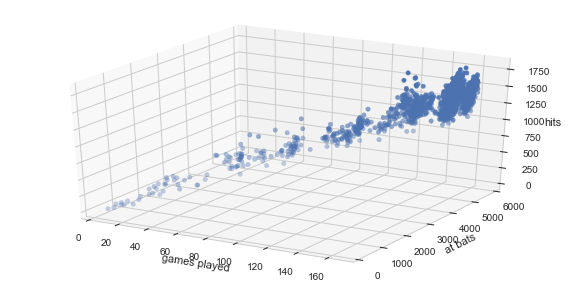

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xs = data['g']
ys = data['ab']
zs = data['h']
ax.scatter(xs, ys, zs)
ax.set_xlabel('games played')
ax.set_ylabel('at bats')
ax.set_zlabel('hits')



# Exercise 6: Build a similar model to predict average hits per year based on Games played, At bats and whether a player is a left or right handed batter. Consider only those players who are either left or right handed batters and for the moment do not worry about missing data or ambidextrous batters. 

In [48]:
info = pd.read_csv("player.csv")

In [49]:
info.columns

Index(['player_id', 'birth_year', 'birth_month', 'birth_day', 'birth_country',
       'birth_state', 'birth_city', 'death_year', 'death_month', 'death_day',
       'death_country', 'death_state', 'death_city', 'name_first', 'name_last',
       'name_given', 'weight', 'height', 'bats', 'throws', 'debut',
       'final_game', 'retro_id', 'bbref_id'],
      dtype='object')

In [51]:
LRB = info[(info['bats'] == 'L') | (info['bats'] == 'R')][['player_id', 'bats']]

In [52]:
LRB.head()

,player_id,bats
0,aardsda01,R
1,aaronha01,R
2,aaronto01,R
3,aasedo01,R
4,abadan01,L


In [54]:
info.head()

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [57]:
player = pd.read_csv("batting.csv")

In [59]:
stats = player[['player_id','year','g','h','bb']]

In [63]:
stats.groupby(['player_id','year'])[stats.columns[2:]].sum().reset_index()
stats.groupby(['player_id'])[stats.columns[2:]].mean().reset_index()
stats.head()

,player_id,year,g,h,bb
0,abercda01,1871,1,0.0,0.0
1,addybo01,1871,25,32.0,4.0
2,allisar01,1871,29,40.0,2.0
3,allisdo01,1871,27,44.0,0.0
4,ansonca01,1871,25,39.0,2.0


In [64]:
data = LRB.merge(stats, how = 'left', on='player_id')

In [65]:
data.head()

,player_id,bats,year,g,h,bb
0,aardsda01,R,2004.0,11.0,0.0,0.0
1,aardsda01,R,2006.0,45.0,0.0,0.0
2,aardsda01,R,2007.0,25.0,0.0,0.0
3,aardsda01,R,2008.0,47.0,0.0,0.0
4,aardsda01,R,2009.0,73.0,0.0,0.0


In [66]:
data['bats'] = data.apply(lambda x: 1 if (x['bats']=='R')else 0,1)

In [67]:
data = data.dropna()

In [68]:
X = data.drop(['player_id', 'h'],1)
Y = data['h']

In [69]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
lr.score(X,Y)

0.8922484473438701